<a href="https://colab.research.google.com/github/msappington11/sudoku-solver/blob/master/handwriting_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import numpy as np
import cv2
from google.colab import drive
import pathlib
import matplotlib.pyplot as plt
#from skimage.morphology import skeletonize, thin

In [ ]:
drive.mount('/content/drive', force_remount=True)
data_dir = pathlib.Path('/content/drive/MyDrive/letter samples')

Mounted at /content/drive


In [ ]:
# trying to load my own data so its more consitent (doesnt work)
trainOnes = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir, # input data
  validation_split=0.2, # 20% validation, 10% test
  subset="training",
  seed=123, # optional randomizer value
  image_size=(28, 28),
  color_mode='grayscale')

testOnes = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir, # input data
  validation_split=0.2, # 20% validation
  subset="validation",
  seed=123, # optional randomizer value
  image_size=(28, 28),
  color_mode='grayscale')

Found 175 files belonging to 1 classes.
Using 140 files for training.
Found 175 files belonging to 1 classes.
Using 35 files for validation.


In [ ]:
# loads data
tf.keras.datasets.mnist.load_data(path='mnist.npz')
(trainData, trainLabels), (testData, testLabels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# gets rid of all the 0s since we dont need them
trainData = trainData[trainLabels != 0]
trainLabels = trainLabels[trainLabels != 0]
testData = testData[testLabels != 0]
testLabels = testLabels[testLabels != 0]

In [ ]:
# makes images either a 0 or 1
thinning = lambda x: thin(x)
trainData = (trainData/255.0 + 0.9) 
trainData = trainData.astype(np.uint8)
#trainData = np.array([thinning(i) for i in trainData])

testData = (testData/255.0 + 0.9)
testData = testData.astype(np.uint8)
#testData = np.array([thinning(i) for i in testData])

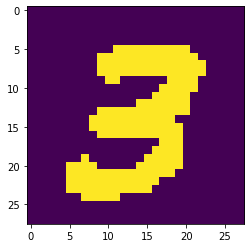

In [ ]:
plt.imshow(trainData[6])

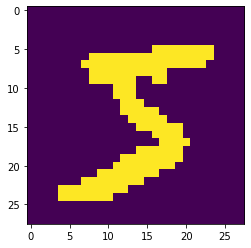

In [ ]:
# formats images into the correct form for NN (converts to int since thin converts to bool and NN needs the pixel to be its own array)
trainData = trainData.astype(np.uint8)
plt.imshow(trainData[0])
trainData = trainData[..., np.newaxis]
testData = testData.astype(np.uint8)
testData = testData[..., np.newaxis]

In [ ]:
# augments data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=3,
    height_shift_range=3,
    zoom_range=0.2)

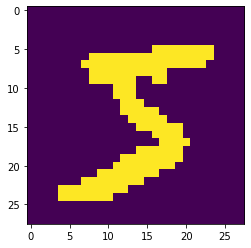

In [ ]:
"OPTIONAL"
# creates a test image from the first image from the train data and formats it to be the correct format for the datagen since it expects a whole dataset (1, 28, 28, 1)
testImage = trainData[0]
plt.imshow(np.squeeze(testImage))
testImage = testImage[np.newaxis, ...]

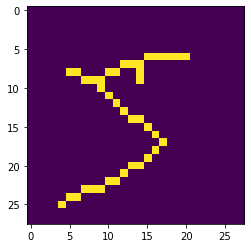

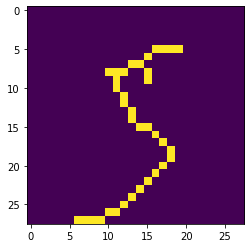

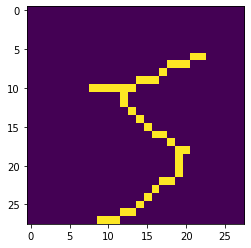

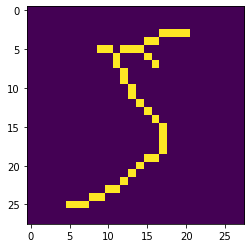

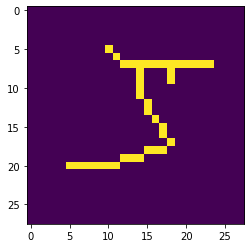

In [ ]:
"OPTIONAL"
# runs through some data augmentations for the test image to see what it does
i = 0

for new in datagen.flow(testImage):
  new = np.squeeze(new, axis=0)
  new = np.squeeze(new)
  new = new + 0.5
  new = new.astype(np.uint8)
  #new = thin(new)
  new = new.astype(np.uint8)
  plt.figure(i)

  plt.imshow(new)
  i+=1
  if(i>4):
    break

In [ ]:
print(np.shape(trainData))
print(np.squeeze(trainData[0]))

(54077, 28, 28, 1)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1))) # first layer. 32 filters in 3x3 size. input shape must be given (image is 28x28x1)
model.add(layers.MaxPooling2D((2, 2))) # pools data from 2x2 area with stride of 2 (no overlap for pooling)
model.add(layers.Conv2D(128, (5, 5), activation='relu')) # another layer with 64 filters in 3x3 area
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) # 64 nodes
model.add(layers.Dense(10)) # 10 is number of outputs

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         102528    
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 628,362
Trainable params: 628,362
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(datagen.flow(trainData, trainLabels), epochs=10, validation_data=datagen.flow(testData, testLabels))


Epoch 1/10
1690/1690 [==============================] - 24s 14ms/step - loss: 0.2593 - accuracy: 0.9167 - val_loss: 0.1009 - val_accuracy: 0.9684
Epoch 2/10
1690/1690 [==============================] - 22s 13ms/step - loss: 0.1060 - accuracy: 0.9664 - val_loss: 0.0779 - val_accuracy: 0.9769
Epoch 3/10
1690/1690 [==============================] - 23s 14ms/step - loss: 0.0842 - accuracy: 0.9735 - val_loss: 0.0699 - val_accuracy: 0.9771
Epoch 4/10
1690/1690 [==============================] - 23s 14ms/step - loss: 0.0738 - accuracy: 0.9762 - val_loss: 0.0580 - val_accuracy: 0.9809
Epoch 5/10
1690/1690 [==============================] - 21s 13ms/step - loss: 0.0650 - accuracy: 0.9797 - val_loss: 0.0533 - val_accuracy: 0.9820
Epoch 6/10
1690/1690 [==============================] - 23s 14ms/step - loss: 0.0586 - accuracy: 0.9816 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 7/10
1690/1690 [==============================] - 24s 14ms/step - loss: 0.0547 - accuracy: 0.9825 - val_loss: 0.0476 -

In [ ]:
test_loss, test_acc = model.evaluate(testData,  testLabels, verbose=2)
print(test_acc)

282/282 - 1s - loss: 0.0337 - accuracy: 0.9906
0.9905765056610107


In [ ]:
values = [2, 3, 6, 7, 9, 2, 9, 7, 3, 4, 7, 8, 6, 4, 2, 1, 7, 1, 6, 7, 6, 1, 1, 8, 3, 7, 5, 1]
predictions = []
squares = []
for i in range(28):
  square = cv2.imread('/content/drive/MyDrive/thick/image{}.png'.format(i))
  square = cv2.cvtColor(square, cv2.COLOR_BGR2GRAY)
  square = square/255.0
  square = square.astype(np.uint8)
  #square = thin(square)
  squares.append(square)
  square = square[..., np.newaxis]
  predict = model.predict(square[np.newaxis, ...])
  classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  predictions.append(classes[np.argmax(predict)])

print(predictions)
print(values)
correct = 0
for i in range(len(values)):
  if(values[i] == predictions[i]):
    correct += 1
  else:
    print('thought:', values[i], 'was', predictions[i])
print('accuracy:', correct/len(values))

[2, 3, 6, 7, 9, 2, 9, 7, 3, 4, 7, 8, 6, 4, 2, 1, 7, 1, 6, 7, 6, 1, 1, 8, 3, 7, 5, 1]
[2, 3, 6, 7, 9, 2, 9, 7, 3, 4, 7, 8, 6, 4, 2, 1, 7, 1, 6, 7, 6, 1, 1, 8, 3, 7, 5, 1]
accuracy: 1.0


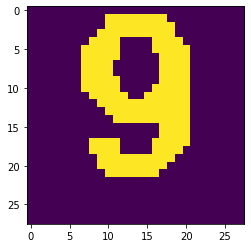

In [ ]:
plt.imshow(squares[4])

In [ ]:
model.save('/content/drive/MyDrive/models/model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/POGGERS3/assets
